# HW 1 - Visualizing Cereals Dataset
###### Elmer Camargo

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import mtcars
import seaborn as sns
from scipy import stats

get_ipython().run_line_magic('matplotlib', 'inline')

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [2]:
cereal = pd.read_csv("data\cereal.csv")
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [3]:
cereal.info()
cereal.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       76 non-null float64
sugars      76 non-null float64
potass      75 non-null float64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [4]:
cereal[cereal.isna().any(axis=1)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,NaN,0,2,1.0,1.00,64.533816
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,110.0,0,1,1.0,0.67,50.828392


In [5]:
cereal = cereal.fillna(0)
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.610390,6.935065,96.103896,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.232257,4.422840,71.251147,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [6]:
#g = sns.pairplot(cereal)

### Relationship Between Fiber and Sodium

It appears that most cereals with low fiber have mid to high sodium values (150 - 300mg) as well as typically more calories, however there are observations of cereals with both low fiber and low sodium as seen on the left half of the scatterplot. Additionally, it does not seem that sodium and fiber have an immediate relationship based off of the regression plot and r2. 

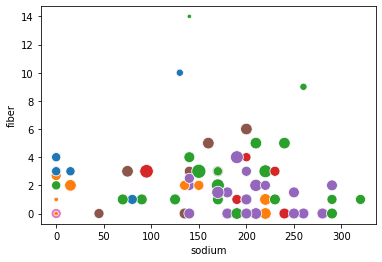

In [7]:
g = sns.scatterplot(data = cereal,x = 'sodium', y = 'fiber', hue = "mfr", size = "calories",
                   sizes=(20, 200), hue_norm=(0, 7), legend = False)

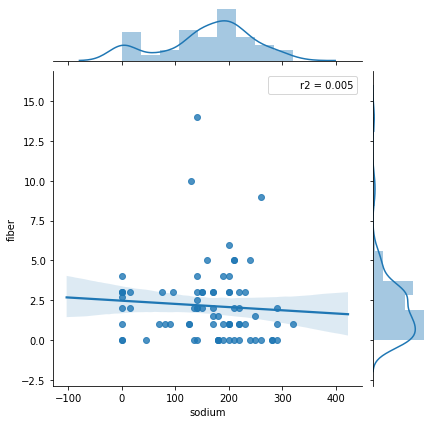

In [8]:
#g = sns.regplot(data = cereal,x = 'sodium', y = 'fiber')
g = sns.jointplot(data = cereal,x = 'sodium', y = 'fiber', kind="reg", stat_func=r2)

In [9]:
cereal_bar = cereal.groupby("shelf").agg({"sugars": ["mean", "std", "min"]})
cereal_bar.columns = ["avg_sugars_g", "std", "min"]
cereal_bar["shelf"] = cereal_bar.index #how you grab row names
cereal_bar

,avg_sugars_g,std,min,shelf
shelf,,,,
1,4.850000,4.510514,0.0,1
2,9.619048,4.128876,0.0,2
3,6.527778,3.835817,0.0,3


### Good cereals are usually on the 2nd or 3rd shelf

couldnt figure out how to fix legend

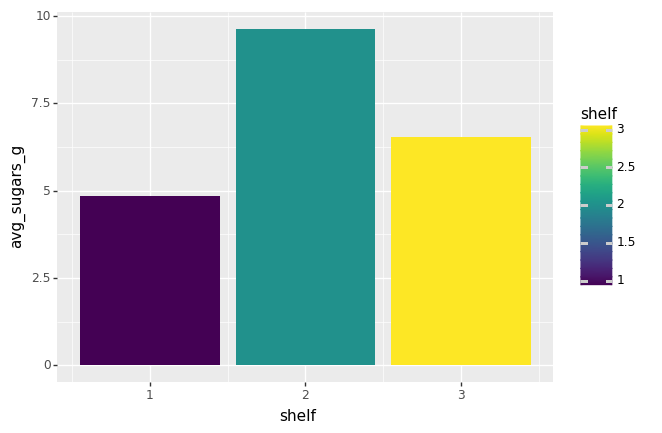

<ggplot: (-9223371927783853816)>

In [10]:
(ggplot(cereal_bar, aes( x = "shelf", y = "avg_sugars_g", fill = "shelf")) 
+ geom_bar(stat = "identity"))

## Protein and Calories by Manufacturer

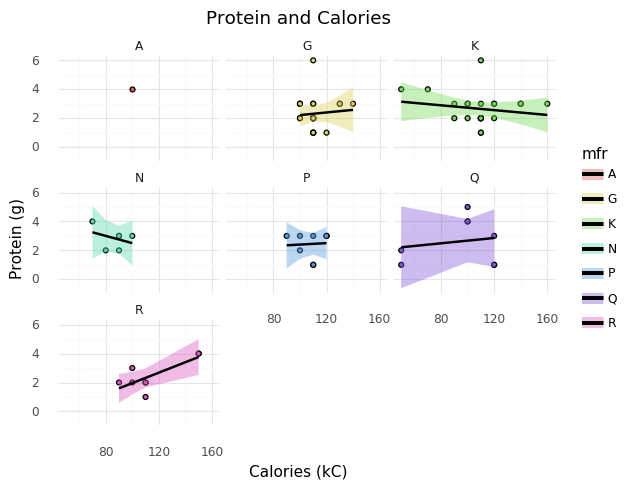

<ggplot: (-9223371927783454356)>

In [11]:
(ggplot(cereal, aes( x = 'calories', y = 'protein'))
       +geom_point(aes(fill = 'mfr'), show_legend = False)
       +stat_smooth(aes(fill = 'mfr'),method = 'lm')
       +facet_wrap('~mfr')
       +labs(x = "Calories (kC)", y = "Protein (g)", title = "Protein and Calories")
       +theme_minimal())

In [4]:
!jupyter nbconvert --output-dir='output/' --to pdf cereal.ipynb
!jupyter nbconvert --output-dir='output/' --to markdown cereal.ipynb
!jupyter nbconvert --output-dir='output/' --to html cereal.ipynb
!jupyter nbconvert --output-dir='output/' --to python cereal.ipynb

[NbConvertApp] Converting notebook cereal.ipynb to pdf
[NbConvertApp] Support files will be in cereal_files\
[NbConvertApp] Making directory .\cereal_files
[NbConvertApp] Making directory .\cereal_files
[NbConvertApp] Making directory .\cereal_files
[NbConvertApp] Making directory .\cereal_files
[NbConvertApp] Writing 36330 bytes to .\notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', '.\\notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', '.\\notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 133004 bytes to output/cereal.pdf
